# Future Restaurant Revenue Prediction
---
## Historical (Descriptive) Sales Trends

In [32]:
import numpy as np
import voila
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("./data/train.csv")
data = data.drop('Id', axis=1)
data['Open Date'] = pd.to_datetime(data['Open Date'])
data['month'] = [x.month for x in data['Open Date']]
data['year'] = [x.year for x in data['Open Date']]
data = data.drop(['Open Date'], axis=1)

[Text(0, 0.5, 'Normalized Revenue (No Currency)'),
 Text(0.5, 1.0, 'Mean Revenue Per Year')]

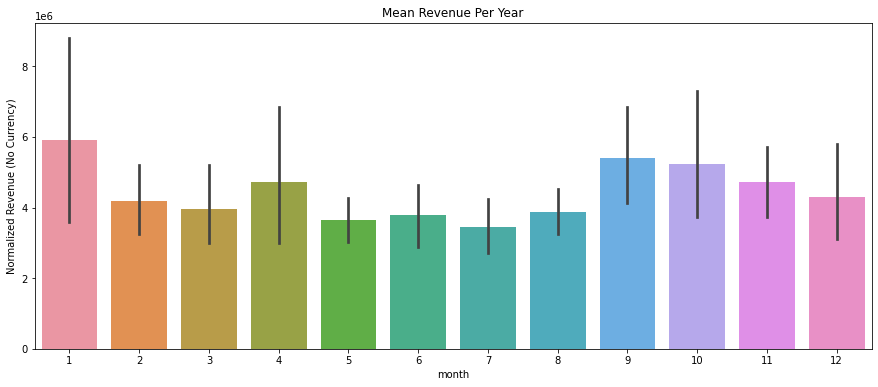

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x='month', y='revenue', data=data).set(ylabel="Normalized Revenue (No Currency)", title="Mean Revenue Per Month")

[Text(0, 0.5, 'Normalized Revenue (No Currency)'),
 Text(0.5, 1.0, 'Mean Revenue Per Year')]

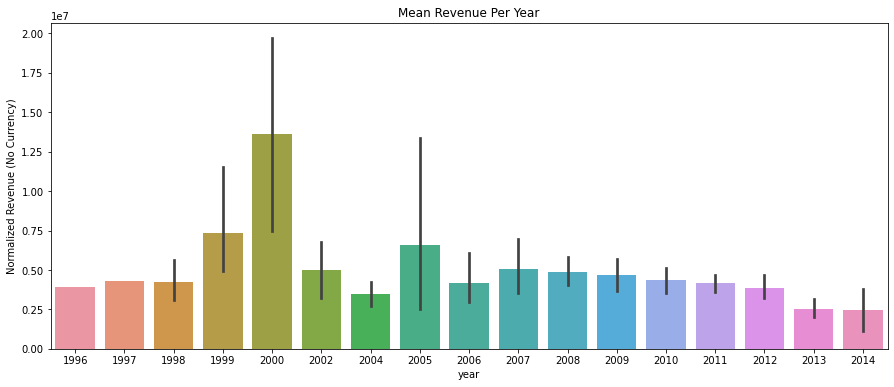

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(x='year', y='revenue', data=data).set(ylabel="Normalized Revenue (No Currency)", title="Mean Revenue Per Year")

[Text(0.5, 0, 'Normalized Revenue (No Currency)'),
 Text(0.5, 1.0, 'Store Revenue')]

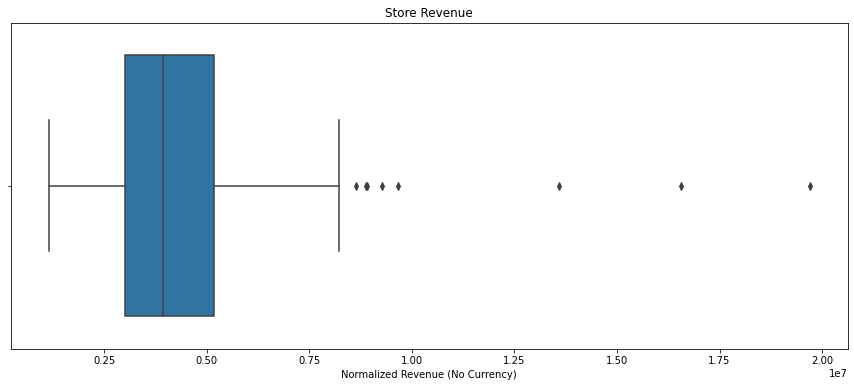

In [23]:
plt.figure(figsize=(15,6))
sns.boxplot(x=data['revenue']).set(xlabel="Normalized Revenue (No Currency)", title="Store Revenue")

In [ ]:
print("25th percentile of revenue: " + str(np.percentile(data['revenue'], 25)))

In [7]:
type = {'FC':0, 'IL':1, 'DT':2}
data['Type'] = data['Type'].map(type)

In [8]:
city_group = {'Big Cities':0, 'Other':1}
data['City Group'] = data['City Group'].map(city_group)

In [9]:
a = data['City'].value_counts()
b = a.index
c = {}
for i, j in enumerate(b):
    c.update({j:i})

In [10]:
data['City'] = data['City'].map(c)

---
## Potential (Predictive) Revenue of Sales
#### by City Type and Order Type

FC: Food Court,
IL: Inline,
DT: Drive Thru,
MB: Mobile,

Because certain data is obfuscated, a restaurant location is chosen at random that fulfills the chosen types.

In [11]:
from sklearn.model_selection import train_test_split
x = data.drop('revenue',axis=1)
y = data['revenue']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

#### Error Analysis:

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
regressor = RandomForestRegressor() #create the object of the model
regressor = regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

abs_mean = mean_absolute_error(y_test, pred)
mean_squared = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('Mean Absolute Error: ', str(abs_mean))
print('Mean Squared Error: ', str(mean_squared))
print('Root Mean Squared Error: ', str(r2))

Mean Absolute Error:  1339700.715
Mean Squared Error:  2783229803095.877
Root Mean Squared Error:  -0.2939181150571477


In [14]:
test_df=pd.read_csv("./data/test.csv")

test_df.fillna(0)
test_df['Open Date'] = pd.to_datetime(test_df['Open Date'])
test_df['month']=[x.month for x in test_df['Open Date']]
test_df['year']=[x.year for x in test_df['Open Date']]
test_df=test_df.drop(['Open Date'],axis=1)

ty1={'FC':0,'IL':1,'DT':2, 'MB':3}
test_df['Type'] = test_df['Type'].map(ty1)
test_df['City Group'] = test_df['City Group'].map(city_group)


a=test_df['City'].value_counts()
b = a.index
c={}
for i,j in enumerate(b):
  c.update({j:i})

test_df['City'] = test_df['City'].map(c)
test_df.drop('Id',axis=1, inplace=True)

In [15]:
def estimate_revenue(CityGroup, OrderType):
    test_df=pd.read_csv("./data/test.csv")

    test_df.fillna(0)
    test_df['Open Date'] = pd.to_datetime(test_df['Open Date'])
    test_df['month']=[x.month for x in test_df['Open Date']]
    test_df['year']=[x.year for x in test_df['Open Date']]
    test_df=test_df.drop(['Open Date'],axis=1)

    ty1={'FC':0,'IL':1,'DT':2, 'MB':3}
    test_df['Type'] = test_df['Type'].map(ty1)
    test_df['City Group'] = test_df['City Group'].map(city_group)


    a=test_df['City'].value_counts()
    b = a.index
    c={}
    for i,j in enumerate(b):
      c.update({j:i})

    test_df['City'] = test_df['City'].map(c)
    test_df.drop('Id',axis=1, inplace=True)
    
    test_df = test_df[test_df["City Group"] == city_group[CityGroup]]
    test_df = test_df[test_df["Type"] == ty1[OrderType]]
    
    test = test_df.sample()
    prediction = regressor.predict(test)
    
    print("A store with city group " + CityGroup + " and order type " + OrderType + " has an estimated revenue of " 
    + str(prediction) + " based off the random sample of test store data.")
    
    if prediction < np.percentile(data['revenue'], 25):
        print("This store is not recommended as it is lower than the 25th percentile of revenue")
    else:
        print("This store is recommended as it is higher than the 25th percentile of revenue")

#### Predict Revenue of Future Stores

In [16]:
from ipywidgets import interact

interact(estimate_revenue, CityGroup=city_group.keys(), OrderType=ty1.keys())

A store with city group Big Cities and order type FC has an estimated revenue of [4646878.25] based off the random sample of test store data.
This store is recommended as it is higher than the 25th percentile of revenue


<function __main__.estimate_revenue(CityGroup, OrderType)>